In [ ]:
!pip install pandas==1.2.4
!pip install numpy==1.18.5
!pip install tensorboard==2.4.0
!pip install tensorboard-plugin-wit==1.7.0
!pip install tensorflow==2.3.0
!pip install tensorflow-datasets==4.3.0
!pip install tensorflow-estimator==2.3.0
!pip install tensorflow-metadata==1.0.0
!pip install keras==2.4.3
!pip install cachelib==0.1.1
!pip install certifi==2020.12.5
!pip install chardet==4.0.0
!pip install click==7.1.2
!pip install colorama==0.4.4
!pip install cors==1.0.1
!pip install filelock==3.0.12
!pip install Flask==1.1.2
!pip install Flask-Cors==3.0.10
!pip install Flask-Dance==3.3.1
!pip install Flask-Session==0.3.2
!pip install future==0.18.2
!pip install gevent==21.1.2
!pip install greenlet==1.0.0
!pip install idna==2.10
!pip install itsdangerous==1.1.0
!pip install Jinja2==2.11.3
!pip install MarkupSafe==1.1.1
!pip install memcache==0.5.1
!pip install oauthlib==3.1.0
!pip install pymemcache==3.4.2
!pip install PySocks==1.7.1
!pip install redis==3.5.3
!pip install requests==2.25.1
!pip install requests-file==1.5.1
!pip install requests-oauthlib==1.3.0
!pip install six==1.15.0
!pip install tldextract==3.1.0
!pip install tweepy==3.10.0
!pip install urllib3==1.26.4
!pip install URLObject==2.4.3
!pip install Werkzeug==1.0.1
!pip install zope.event==4.5.0
!pip install zope.interface==5.4.0

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import sys
import time
import random
from datetime import datetime

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import pydot

import tensorflow as tf
from tensorflow.keras import backend as K

In [ ]:
print(tf.__version__)
print(pd.__version__)

2.3.0
1.2.4


***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Genuine users and tweets
gen_users = pd.read_csv('/content/drive/MyDrive/Dataset/users.csv')
# gen_tweets = pd.read_csv('/content/drive/MyDrive/Dataset/sample-data/tweets.csv')

In [ ]:
def create_digital_dna_from_profile(users_df):
    df = users_df
    
    # Applying necessary replacements
    # 1 - Description is available, 0 - Description not available
    # 1 - URL is available, 0 - URL is not available
    df['description'] = np.where(pd.isnull(users_df['description']) == True, 0, 1)
    df['url'] = np.where(pd.isnull(users_df['url']) == True, 0, 1)
    
    # Changed user data
    return df

def create_digital_dna_from_tweets(tweets_df):
    '''For each user id in tweets_df return a digital DNA string based on posting behaviour.'''
    
    # Add columns for counts of tweets, replies and retweets.
    tweets_df['num_retweets'] = np.where(tweets_df['retweeted_status_id'] == 0, 0, 1)
    tweets_df['num_replies'] = np.where(tweets_df['in_reply_to_status_id'] == 0, 0, 1)
    tweets_df['num_tweets'] = np.where((tweets_df['num_retweets'] == 0) & (tweets_df['num_replies'] == 0), 1, 0)
    
    tweets = tweets_df['num_tweets'] == 1
    retweets = tweets_df['num_retweets'] == 1
    replies = tweets_df['num_replies'] == 1

    # DNA alphabet for tweet (A), retweet (C) and reply (T).
    tweets_df.loc[:, 'DNA'] = np.where(retweets, ' C', np.where(replies, ' T', ' A'))

    # Sort tweets by timestamp.
    tweets_df = tweets_df[['user_id', 'timestamp', 'DNA']]
    tweets_df = tweets_df.sort_values(by=['timestamp'])

    # Create digital DNA string for account.
    dna = tweets_df.groupby(by=['user_id'])['DNA'].agg(lambda x: ''.join(x))
    
    return dna

In [ ]:
# Assigning float valeus in fields where necessary
def time_to_number(time_str):
    return np.float32(datetime.fromisoformat(time_str).timestamp())

def number_to_float(number):
    return np.float32(number)

def time_to_float(df, column_name):
    for index, value in enumerate(df[column_name]):
        df[column_name].at[index] = time_to_number(value)

def to_float(df, column_name):
    for index, value in enumerate(df[column_name]):
        df[column_name].at[index] = number_to_float(value)

In [ ]:
print(gen_users)

              id               name  ... test_set_1  test_set_2
0     1502026416    TASUKU HAYAKAWA  ...          0           0
1     2492782375              ro_or  ...          0           0
2      293212315           bearclaw  ...          0           0
3      191839658  pocahontas farida  ...          0           0
4     3020965143           Ms Kathy  ...          0           0
...          ...                ...  ...        ...         ...
3469   205218909         Alejandro   ...          0           0
3470  2874966164    Zubair Niazi Ⓜ️  ...          0           0
3471  2980901837            Zuhazuu  ...          0           0
3472   121122678            zveljka  ...          0           0
3473  2910276853       // karime //  ...          1           1

[3474 rows x 42 columns]


In [ ]:
gen_users.dtypes

id                                      int64
name                                   object
screen_name                            object
statuses_count                          int64
followers_count                         int64
friends_count                           int64
favourites_count                        int64
listed_count                            int64
url                                    object
lang                                   object
time_zone                              object
location                               object
default_profile                       float64
default_profile_image                 float64
geo_enabled                           float64
profile_image_url                      object
profile_banner_url                     object
profile_use_background_image          float64
profile_background_image_url_https     object
profile_text_color                     object
profile_image_url_https                object
profile_sidebar_border_color      

In [ ]:
to_float(gen_users, "statuses_count")
to_float(gen_users, "followers_count")
to_float(gen_users, "friends_count")
to_float(gen_users, "favourites_count")
to_float(gen_users, "listed_count")

time_to_float(gen_users, "timestamp")
time_to_float(gen_users, "updated")

In [ ]:
def convert_to_data(data):
    return pd.DataFrame(data)

In [ ]:
print('Users shape:', gen_users.shape)
# print('Tweets shape:', gen_tweets.shape)

Users shape: (3474, 42)


***

# User Data - Section:

## Data Processing

In [ ]:
# Filtering data which we need

twitter_account = gen_users.filter(["statuses_count", "followers_count",
                                    "friends_count", "favourites_count", "listed_count",
                                    "url", "description", "timestamp", "updated"])

In [ ]:
print(twitter_account.head(10))

   statuses_count  followers_count  ...     timestamp       updated
0            2177              208  ...  1370956800.0  1458057216.0
1            2660              330  ...  1399984640.0  1458057216.0
2            1254              166  ...  1304558976.0  1458057216.0
3          202968             2248  ...  1284739328.0  1458057216.0
4              82               21  ...  1423199488.0  1458057216.0
5           12915              641  ...  1382980096.0  1458057216.0
6           13676             1042  ...  1381255168.0  1458057216.0
7           61294              561  ...  1298353024.0  1458057216.0
8            4854              337  ...  1378421504.0  1458057216.0
9            2408              421  ...  1365417472.0  1458057216.0

[10 rows x 9 columns]


In [ ]:
# Processing user data and tweets of users
twitter_account = create_digital_dna_from_profile(twitter_account)
print('Users data shape:', twitter_account.shape)

Users data shape: (3474, 9)


## Processed Data

In [ ]:
twitter_account['timestamp']

0       1370956800.0
1       1399984640.0
2       1304558976.0
3       1284739328.0
4       1423199488.0
            ...     
3469    1287582208.0
3470    1414153856.0
3471    1421405952.0
3472    1268060416.0
3473    1416943360.0
Name: timestamp, Length: 3474, dtype: object

In [ ]:
print(type(twitter_account['timestamp']))
twitter_account['timestamp'] = twitter_account['timestamp'].astype(float)
twitter_account['updated'] = twitter_account['updated'].astype(float)

<class 'pandas.core.series.Series'>


In [ ]:
twitter_account['timestamp_normalized'] = np.log10(twitter_account['timestamp'])
twitter_account['updated_normalized'] = np.log10(twitter_account['updated'])

In [ ]:
twitter_account['timestamp']

0       1.370957e+09
1       1.399985e+09
2       1.304559e+09
3       1.284739e+09
4       1.423199e+09
            ...     
3469    1.287582e+09
3470    1.414154e+09
3471    1.421406e+09
3472    1.268060e+09
3473    1.416943e+09
Name: timestamp, Length: 3474, dtype: float64

In [ ]:
twitter_account['timestamp_normalized']

0       9.137024
1       9.146123
2       9.115464
3       9.108815
4       9.153266
          ...   
3469    9.109775
3470    9.150497
3471    9.152718
3472    9.103140
3473    9.151352
Name: timestamp_normalized, Length: 3474, dtype: float64

In [ ]:
twitter_account['updated_normalized']

0       9.163775
1       9.163775
2       9.163775
3       9.163775
4       9.163775
          ...   
3469    9.163775
3470    9.163775
3471    9.163775
3472    9.163775
3473    9.163775
Name: updated_normalized, Length: 3474, dtype: float64

In [ ]:
print(twitter_account.head(10))

   statuses_count  followers_count  ...  timestamp_normalized  updated_normalized
0            2177              208  ...              9.137024            9.163775
1            2660              330  ...              9.146123            9.163775
2            1254              166  ...              9.115464            9.163775
3          202968             2248  ...              9.108815            9.163775
4              82               21  ...              9.153266            9.163775
5           12915              641  ...              9.140816            9.163775
6           13676             1042  ...              9.140274            9.163775
7           61294              561  ...              9.113393            9.163775
8            4854              337  ...              9.139382            9.163775
9            2408              421  ...              9.135265            9.163775

[10 rows x 11 columns]


In [ ]:
# Filtering data which we need
twitter_account.drop(['timestamp','updated'],axis='columns', inplace=True)

In [ ]:
print(twitter_account.head(10))

   statuses_count  followers_count  ...  timestamp_normalized  updated_normalized
0            2177              208  ...              9.137024            9.163775
1            2660              330  ...              9.146123            9.163775
2            1254              166  ...              9.115464            9.163775
3          202968             2248  ...              9.108815            9.163775
4              82               21  ...              9.153266            9.163775
5           12915              641  ...              9.140816            9.163775
6           13676             1042  ...              9.140274            9.163775
7           61294              561  ...              9.113393            9.163775
8            4854              337  ...              9.139382            9.163775
9            2408              421  ...              9.135265            9.163775

[10 rows x 9 columns]


***

## Parameters

In [ ]:
user_no_epochs        = 20
user_validation_split = 0.1
user_latent_dim       = 9

***

## Model

In [ ]:
"""
Dropping tweets data because this model will be trianed just on the user data.
Converting all the other fields to float64 then giving it the shape for input.
The final variable contains the numpy array made from the dataframe.
"""
training_data              = twitter_account
training_data              = training_data.apply(pd.to_numeric)
training_data              = training_data.values.reshape(training_data.shape[0], training_data.shape[1])
features_in_feature_vector = training_data.shape[1]
input_shape                = (features_in_feature_vector, )

In [ ]:
training_data      = training_data.T
mean               = np.mean(training_data, axis=0)
standard_deviation = np.std(training_data, axis=0)
training_data      = (training_data - mean) / standard_deviation
training_data = training_data.T

In [ ]:
input_shape

(9,)

## Encoder

In [ ]:
# Define sampling with reparameterization trick
def sample_z(args):
    mu, sigma = args
    batch     = K.shape(mu)[0]
    dim       = K.int_shape(mu)[1]
    eps       = K.random_normal(shape=(batch, dim))
    return mu + K.exp(sigma / 2) * eps

In [ ]:
i       = tf.keras.layers.Input(shape=input_shape, name='encoder_input')
x       = tf.keras.layers.Dense(features_in_feature_vector, activation='relu')(i)
mu      = tf.keras.layers.Dense(1, name='latent_mu')(x)
sigma   = tf.keras.layers.Dense(1, name='latent_sigma')(x)
# Reparameterization for correct gradient
z = tf.keras.layers.Lambda(sample_z, output_shape=(1, ), name='z')([mu, sigma])

In [ ]:
# Reparameterization for correct gradient
z = tf.keras.layers.Lambda(sample_z, output_shape=(1, ), name='z')([mu, sigma])

In [ ]:
# Instantiate encoder
user_data = encoder = tf.keras.Model(i, [mu, sigma, z], name='encoder')
user_data.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 9)]          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 9)            90          encoder_input[0][0]              
__________________________________________________________________________________________________
latent_mu (Dense)               (None, 1)            10          dense_15[0][0]                   
__________________________________________________________________________________________________
latent_sigma (Dense)            (None, 1)            10          dense_15[0][0]                   
____________________________________________________________________________________________

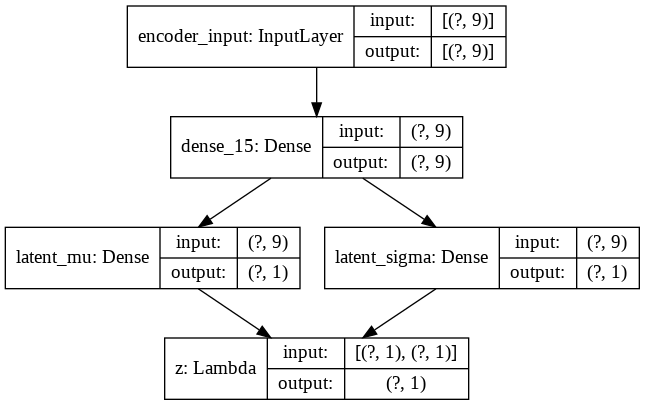

In [ ]:
tf.keras.utils.plot_model(user_data, show_shapes=True)

## Decoder

In [ ]:
d_i    = tf.keras.layers.Input(shape=(1, ), name='decoder_input')
x      = tf.keras.layers.Dense(3, activation='sigmoid')(d_i)
x      = tf.keras.layers.Dense(features_in_feature_vector, activation='sigmoid')(x)
o      = tf.keras.layers.Reshape(input_shape, name='decoder_output')(x)

In [ ]:
# Instantiate decoder
decoder = tf.keras.Model(d_i, o, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 1)]               0         
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_17 (Dense)             (None, 9)                 36        
_________________________________________________________________
decoder_output (Reshape)     (None, 9)                 0         
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoder.output_shape

(None, 9)

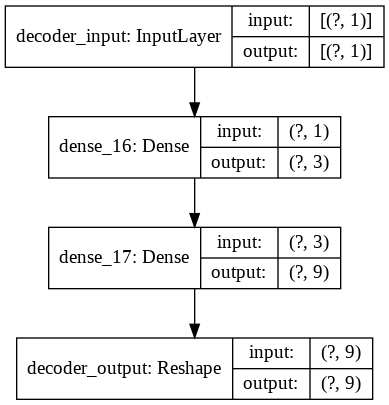

In [ ]:
tf.keras.utils.plot_model(decoder, show_shapes=True)

# VAE - User Data

In [ ]:
# Instantiate VAE
vae_outputs = decoder(encoder(i)[2])
vae         = tf.keras.Model(i, vae_outputs, name='User_Data-VAE')
vae.summary()

Model: "User_Data-VAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 9)]               0         
_________________________________________________________________
encoder (Functional)         [(None, 1), (None, 1), (N 110       
_________________________________________________________________
decoder (Functional)         (None, 9)                 42        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


## Loss Function

In [ ]:
"""
KL Divergence metric this one which 
we are using loss function.
"""
user_data_kl_divergence_loss = tf.keras.losses.KLDivergence(reduction="auto", name="kl_divergence")

## Training

In [ ]:
"""
We are using the adam optimizer from Keras in combination
of KL Divergence loss function also from Keras.
"""
vae.compile(optimizer='adam', loss=user_data_kl_divergence_loss, run_eagerly=True)

In [ ]:
#Splitting the dataset into 80-20 percent
from sklearn.model_selection import train_test_split

train, test = train_test_split(training_data, test_size=0.2)

In [ ]:
train = convert_to_data(train)
test = convert_to_data(test)

In [ ]:
print(train)

             0         1         2  ...         6         7         8
0     2.823020 -0.339885 -0.355457  ... -0.388511 -0.388310 -0.388308
1     2.823193 -0.338080 -0.325003  ... -0.393893 -0.391307 -0.391289
2    -0.149889 -0.253002 -0.286145  ... -0.428846 -0.421384 -0.421330
3     2.827131 -0.337252 -0.281480  ... -0.375626 -0.374821 -0.374815
4     2.827911 -0.304304 -0.340082  ... -0.365395 -0.364800 -0.364796
...        ...       ...       ...  ...       ...       ...       ...
2774  2.791660 -0.348390 -0.381791  ... -0.431893 -0.430403 -0.430394
2775  1.429317 -0.452686 -0.449966  ... -0.554237 -0.551790 -0.551769
2776  2.810919 -0.321892 -0.053529  ... -0.420863 -0.412227 -0.412143
2777  2.821266 -0.353371 -0.347189  ... -0.392662 -0.391974 -0.391971
2778  2.108494 -0.471628 -0.403704  ... -0.568308 -0.564278 -0.564261

[2779 rows x 9 columns]


In [ ]:
print(test)

            0         1         2  ...         6         7         8
0    2.236627 -0.536444 -0.415876  ... -0.605340 -0.447881 -0.447503
1    2.666160 -0.315185 -0.318475  ... -0.522474 -0.519802 -0.519788
2    2.825109 -0.222367 -0.341343  ... -0.384437 -0.376839 -0.376789
3    1.223805 -0.468843 -0.079767  ... -0.604215 -0.600261 -0.600240
4    1.655717  0.052752  1.990665  ... -0.653031 -0.555562 -0.555373
..        ...       ...       ...  ...       ...       ...       ...
690  2.532344  0.249379  0.648062  ... -0.650444 -0.632296 -0.632261
691  0.492255  2.671935 -0.050670  ... -0.525365 -0.519476 -0.519440
692  2.811527 -0.323593 -0.080926  ... -0.429401 -0.420053 -0.420012
693  1.755899  0.548884 -0.256564  ... -0.747239 -0.737814 -0.737792
694  2.733853 -0.320875 -0.154345  ... -0.513025 -0.509308 -0.509290

[695 rows x 9 columns]


In [ ]:
history = vae.fit(x = train, y = train, 
        epochs = user_no_epochs,
        shuffle = False,
        validation_split=user_validation_split,
        validation_data=train)

Epoch 1/20
79/79 [==============================] - 1s 16ms/step - loss: 1.3482 - val_loss: 1.2931
Epoch 2/20
79/79 [==============================] - 1s 15ms/step - loss: 1.1366 - val_loss: 1.0751
Epoch 3/20
79/79 [==============================] - 1s 16ms/step - loss: 0.9351 - val_loss: 0.8897
Epoch 4/20
79/79 [==============================] - 1s 14ms/step - loss: 0.7821 - val_loss: 0.7563
Epoch 5/20
79/79 [==============================] - 1s 14ms/step - loss: 0.6662 - val_loss: 0.6476
Epoch 6/20
79/79 [==============================] - 1s 14ms/step - loss: 0.5619 - val_loss: 0.5397
Epoch 7/20
79/79 [==============================] - 1s 14ms/step - loss: 0.4549 - val_loss: 0.4316
Epoch 8/20
79/79 [==============================] - 1s 14ms/step - loss: 0.3561 - val_loss: 0.3400
Epoch 9/20
79/79 [==============================] - 1s 15ms/step - loss: 0.2767 - val_loss: 0.2682
Epoch 10/20
79/79 [==============================] - 1s 15ms/step - loss: 0.2145 - val_loss: 0.2115
Epoch 11/

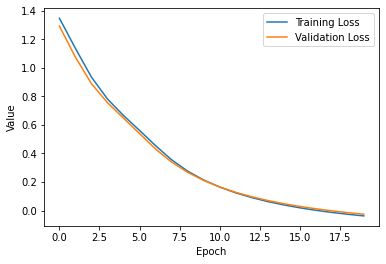

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()

In [ ]:
predicted_data = convert_to_data(vae.predict(test)) - 1
print(predicted_data)

            0         1         2  ...         6         7         8
0   -0.065408 -0.039930 -0.032071  ... -0.321353 -0.298517 -0.223624
1   -0.065414 -0.039935 -0.032075  ... -0.321357 -0.298522 -0.223628
2   -0.065533 -0.040036 -0.032165  ... -0.321443 -0.298621 -0.223730
3   -0.065407 -0.039928 -0.032070  ... -0.321352 -0.298516 -0.223622
4   -0.065399 -0.039922 -0.032064  ... -0.321347 -0.298510 -0.223617
..        ...       ...       ...  ...       ...       ...       ...
690 -0.065388 -0.039913 -0.032055  ... -0.321339 -0.298501 -0.223609
691 -0.066752 -0.041076 -0.033081  ... -0.322347 -0.299698 -0.225026
692 -0.065462 -0.039975 -0.032112  ... -0.321392 -0.298561 -0.223667
693 -0.065387 -0.039912 -0.032054  ... -0.321338 -0.298500 -0.223608
694 -0.065418 -0.039938 -0.032078  ... -0.321360 -0.298525 -0.223631

[695 rows x 9 columns]


In [ ]:
print(train)

             0         1         2  ...         6         7         8
0     2.823020 -0.339885 -0.355457  ... -0.388511 -0.388310 -0.388308
1     2.823193 -0.338080 -0.325003  ... -0.393893 -0.391307 -0.391289
2    -0.149889 -0.253002 -0.286145  ... -0.428846 -0.421384 -0.421330
3     2.827131 -0.337252 -0.281480  ... -0.375626 -0.374821 -0.374815
4     2.827911 -0.304304 -0.340082  ... -0.365395 -0.364800 -0.364796
...        ...       ...       ...  ...       ...       ...       ...
2774  2.791660 -0.348390 -0.381791  ... -0.431893 -0.430403 -0.430394
2775  1.429317 -0.452686 -0.449966  ... -0.554237 -0.551790 -0.551769
2776  2.810919 -0.321892 -0.053529  ... -0.420863 -0.412227 -0.412143
2777  2.821266 -0.353371 -0.347189  ... -0.392662 -0.391974 -0.391971
2778  2.108494 -0.471628 -0.403704  ... -0.568308 -0.564278 -0.564261

[2779 rows x 9 columns]


In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(test, predicted_data))
print(rms)

0.9689291794153992


In [ ]:
training_data = convert_to_data(training_data)

In [ ]:
"""
Graphs of original and reconstructed output
displayed for all of the feature vectors
individually.
"""
# for i in range(19,40):
#     plt.plot(train.loc[i], color='blue')
#     plt.plot(predicted_data.loc[i], color='red')
#     plt.xlabel('Index')
#     plt.ylabel('Value')
#     plt.figure(i)
#     plt.show()

'\nGraphs of original and reconstructed output\ndisplayed for all of the feature vectors\nindividually.\n'

***

In [ ]:
#saving model
# vae.save('/content/drive/MyDrive/Dataset/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset/assets


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Dataset/')

In [ ]:
test_predict = model.predict(test)

In [ ]:
fake_users = pd.read_csv('/content/drive/MyDrive/Dataset/fake_followers/users.csv')

In [ ]:
# Filtering data which we need

fake_users = fake_users.filter(["statuses_count", "followers_count",
                                    "friends_count", "favourites_count", "listed_count",
                                    "url", "description", "timestamp", "updated"])

In [ ]:
fake_users['timestamp'] = fake_users['updated']

In [ ]:
to_float(fake_users, "statuses_count")
to_float(fake_users, "followers_count")
to_float(fake_users, "friends_count")
to_float(fake_users, "favourites_count")
to_float(fake_users, "listed_count")

time_to_float(fake_users, "timestamp")
time_to_float(fake_users, "updated")

In [ ]:
fake_account = fake_users.filter(["statuses_count", "followers_count",
                                    "friends_count", "favourites_count", "listed_count",
                                    "url", "description", "timestamp", "updated"])

In [ ]:
fake_account = create_digital_dna_from_profile(fake_account)

fake_account['timestamp'] = fake_account['timestamp'].astype(float)
fake_account['updated'] = fake_account['updated'].astype(float)

fake_account['timestamp_normalized'] = np.log10(fake_account['timestamp'])
fake_account['updated_normalized'] = np.log10(fake_account['updated'])

# Filtering data which we need
fake_account.drop(['timestamp','updated'],axis='columns', inplace=True)


In [ ]:
fake_data              = fake_account
fake_data              = fake_data.apply(pd.to_numeric)
fake_data              = fake_data.values.reshape(fake_data.shape[0], fake_data.shape[1])

In [ ]:
fake_data      = fake_data.T
mean               = np.mean(fake_data, axis=0)
standard_deviation = np.std(fake_data, axis=0)
fake_data      = (fake_data - mean) / standard_deviation
fake_data = fake_data.T

In [ ]:
fake_predict = model.predict(fake_data)
#Mean Squared Error
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(fake_data, fake_predict))

In [ ]:
RMSE_Threshold = 1.22
TP = 1
FP = 1
TN = 1
FN = 1

In [ ]:
fake_data = convert_to_data(fake_data)
test = convert_to_data(test)

In [ ]:
for user in range(1000):
  data = fake_data.iloc[user]
  i = 0
  test_user = np.zeros((1, 9))
  for x in data:
    test_user[0][i] = x
    i = i + 1

  fake_predict = model.predict(test_user)
  #Mean Squared Error
  from sklearn.metrics import mean_squared_error
  rms = np.sqrt(mean_squared_error(test_user, fake_predict))
  # print(rms)

  if rms >= RMSE_Threshold:
    #Fake
    TP = TP + 1
  else:
    FN = FN + 1

print(RMSE_Threshold)

1.22


In [ ]:
for user in range(695):
  data = test.iloc[user]
  i = 0
  test_user = np.zeros((1, 9))
  for x in data:
    test_user[0][i] = x
    i = i + 1

  _predict = model.predict(test_user)
  #Mean Squared Error
  from sklearn.metrics import mean_squared_error
  rms = np.sqrt(mean_squared_error(test_user, _predict))
  # print(rms)


  if rms >= RMSE_Threshold:
    #Fake
    FP = FP + 1
  else:
    TN = TN + 1

print(RMSE_Threshold)

1.22


In [ ]:
# Confusion matrix when RMSE_Threshold = 1.26
print(f'TP : {TP}')
print(f'TN : {TN}')
print(f'FP : {FP}')
print(f'FN : {FN}')

Accuracy = (TP+TN)/2000
print(f'Accuracy : {Accuracy}')

Precision = TP / (TP + FP)
print(f'Precision : {Precision}')

Recall = TP / (TP + FN)
print(f'Recall : {Recall}')


F1_Score = (2 * Precision * Recall) / (Precision + Recall)
print(f'F1_Score : {F1_Score}')

TP : 855
TN : 143
FP : 554
FN : 147
Accuracy : 0.499
Precision : 0.6068133427963094
Recall : 0.8532934131736527
F1_Score : 0.7092492741600995


In [ ]:
# Confusion matrix when RMSE_Threshold = 1.21
print(f'TP : {TP}')
print(f'TN : {TN}')
print(f'FP : {FP}')
print(f'FN : {FN}')

Accuracy = (TP+TN)/2000
print(f'Accuracy : {Accuracy}')

Precision = TP / (TP + FP)
print(f'Precision : {Precision}')

Recall = TP / (TP + FN)
print(f'Recall : {Recall}')


F1_Score = (2 * Precision * Recall) / (Precision + Recall)
print(f'F1_Score : {F1_Score}')

TP : 841
TN : 656
FP : 41
FN : 161
Accuracy : 0.7485
Precision : 0.953514739229025
Recall : 0.8393213572854291
F1_Score : 0.8927813163481954


In [ ]:
# Confusion matrix when RMSE_Threshold = 1.22
print(f'TP : {TP}')
print(f'TN : {TN}')
print(f'FP : {FP}')
print(f'FN : {FN}')

Accuracy = (TP+TN)/2000
print(f'Accuracy : {Accuracy}')

Precision = TP / (TP + FP)
print(f'Precision : {Precision}')

Recall = TP / (TP + FN)
print(f'Recall : {Recall}')


F1_Score = (2 * Precision * Recall) / (Precision + Recall)
print(f'F1_Score : {F1_Score}')

TP : 609
TN : 694
FP : 3
FN : 393
Accuracy : 0.6515
Precision : 0.9950980392156863
Recall : 0.6077844311377245
F1_Score : 0.7546468401486989


In [ ]:
# Confusion matrix when RMSE_Threshold = 1.19
print(f'TP : {TP}')
print(f'TN : {TN}')
print(f'FP : {FP}')
print(f'FN : {FN}')

Accuracy = (TP+TN)/2000
print(f'Accuracy : {Accuracy}')

Precision = TP / (TP + FP)
print(f'Precision : {Precision}')

Recall = TP / (TP + FN)
print(f'Recall : {Recall}')


F1_Score = (2 * Precision * Recall) / (Precision + Recall)
print(f'F1_Score : {F1_Score}')

TP : 973
TN : 324
FP : 373
FN : 29
Accuracy : 0.6485
Precision : 0.7228826151560178
Recall : 0.9710578842315369
F1_Score : 0.8287904599659284


# ------------------------------------------------------------------------------------------------------------